Movielens Case Study

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [13]:
#import rating data

dfrating=pd.read_csv("C:\\Users\\manus\\Desktop\\Dataset\\archive (3)\\ratings.csv")

In [15]:
dfrating.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [16]:
#import movies data

dfmovies= pd.read_csv("C:\\Users\\manus\\Desktop\\Dataset\\archive (3)\\movies.csv")

In [17]:
dfmovies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [18]:
#import user data

dfusers= pd.read_csv("C:\\Users\\manus\\Desktop\\Dataset\\archive (3)\\user_demographics.csv")

In [19]:
dfusers.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [23]:
dfusers.drop(['occupation'], axis=1)

,user_id,age,sex,zip_code
0,1,24,M,85711
1,2,53,F,94043
2,3,23,M,32067
3,4,24,M,43537
4,5,33,F,15213
...,...,...,...,...
938,939,26,F,33319
939,940,32,M,02215
940,941,20,M,97229
941,942,48,F,78209


In [24]:
dfusers.shape

(943, 5)

In [25]:
dfrating.shape

(105339, 4)

In [26]:
dfmovies.shape

(10329, 3)

We can see that the movies dataset and ratings dataset have Movie ID column in common. So we combine both these datsets using merge function.

In [30]:
dfmovierating=dfmovies.merge(dfrating,on='movieId', how='inner')

In [31]:
dfmovierating.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0,859046895
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1303501039
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,5.0,858610933
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.0,850815810
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.0,851766286


In [32]:
dfmovierating.shape

(105339, 6)

In [36]:
dfmovierating=dfmovierating.rename(columns = {'userId':'user_id'})


In [37]:
dfmovierating.head()

,movieId,title,genres,user_id,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0,859046895
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1303501039
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,5.0,858610933
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.0,850815810
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.0,851766286


Next we use the combined dataset to merge with the users dataset to form a a master dataset which contains all the column in the three seperate datasets.

In [39]:
dfmaster=dfmovierating.merge(dfusers, on='user_id', how='inner')

In [40]:
dfmaster.head()

,movieId,title,genres,user_id,rating,timestamp,age,sex,occupation,zip_code
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0,859046895,53,F,other,94043
1,3,Grumpier Old Men (1995),Comedy|Romance,2,2.0,859046959,53,F,other,94043
2,5,Father of the Bride Part II (1995),Comedy,2,3.0,859046959,53,F,other,94043
3,14,Nixon (1995),Drama,2,4.0,859047091,53,F,other,94043
4,17,Sense and Sensibility (1995),Drama|Romance,2,5.0,859046896,53,F,other,94043


In [41]:
dfmaster.shape

(105339, 10)

In [42]:
dfmaster.to_csv("C:\\Users\\manus\\Desktop\\Dataset\\archive (3)\\master.csv")

Exploratory Data Analysis

#Finding the unique number of items in different columns

In [44]:
dfmaster['title'].nunique()

10323

In [46]:
dfmaster['genres'].nunique()

938

In [47]:
dfmaster['age'].nunique()

60

In [48]:
dfmaster['age'].unique()

array([53, 33, 36, 39, 45, 30, 32, 41,  7, 24, 28, 26, 29, 21, 18, 22, 50,
       27, 48, 40, 49, 43, 25, 44, 47, 20, 31, 38, 23, 52, 15, 42, 35, 37,
       19, 51, 11, 60, 68, 55, 64, 16, 57, 10, 73, 46, 34, 56, 69, 13, 63,
       17, 62, 65, 14, 61, 66, 54, 58, 59], dtype=int64)

In [49]:
dfmaster['age'].value_counts()

29    10169
33     5759
30     5651
24     5018
47     4246
37     3703
27     3625
31     3574
28     3553
20     3083
23     2965
25     2902
22     2893
21     2874
49     2502
42     2491
32     2447
19     2199
39     2176
48     2140
26     2093
44     2047
50     2008
45     1918
38     1752
15     1712
35     1702
55     1700
16     1540
36     1487
18     1477
40     1426
34     1350
51     1077
43     1045
57      950
60      753
17      717
53      630
46      574
56      512
41      507
52      344
54      330
13      268
10      233
65      185
66      142
68      128
73      110
7        97
64       88
61       83
14       80
62       75
63       62
11       61
69       60
58       25
59       21
Name: age, dtype: int64

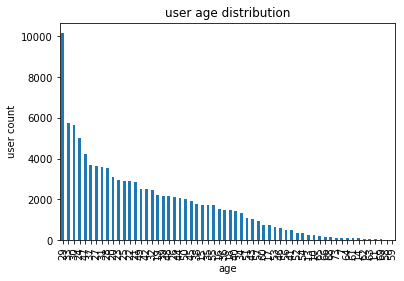

In [52]:
dfmaster['age'].value_counts().plot(kind='bar')
plt.xlabel('age')
plt.title('user age distribution')
plt.ylabel('user count')
plt.show()

In [53]:
#next we find the users by sex

dfmaster['sex'].value_counts()

M    74512
F    30827
Name: sex, dtype: int64

The number of Male users are far more in number when compared with female users. Next we visualize this using bar plot.

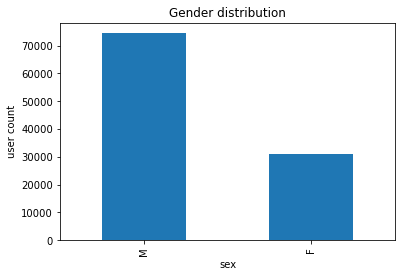

In [54]:
dfmaster['sex'].value_counts().plot(kind='bar')
plt.xlabel('sex')
plt.title('Gender distribution')
plt.ylabel('user count')
plt.show()

User rating of the movie "Toy Story" 

In [55]:
#we only select the rows that contains toy story

dftoystory=dfmaster[dfmaster['title'].str.contains('Toy Story')==True]
dftoystory

,movieId,title,genres,user_id,rating,timestamp,age,sex,occupation,zip_code
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0,859046895,53,F,other,94043
29,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1303501039,33,F,other,15213
97,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,5.0,858610933,36,M,administrator,05201
156,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.0,850815810,39,F,other,30329
253,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.0,851766286,45,M,scientist,55106
...,...,...,...,...,...,...,...,...,...,...
102055,3114,Toy Story 2 (1999),Adventure|Animation|Children|Comedy|Fantasy,651,3.0,1064248643,65,M,retired,02903
102291,3114,Toy Story 2 (1999),Adventure|Animation|Children|Comedy|Fantasy,525,4.0,946570258,27,F,administrator,19711
102993,78499,Toy Story 3 (2010),Adventure|Animation|Children|Comedy|Fantasy|IMAX,447,1.0,1444584032,30,M,administrator,55113
103359,78499,Toy Story 3 (2010),Adventure|Animation|Children|Comedy|Fantasy|IMAX,535,4.5,1432618538,45,F,educator,80302


In [56]:
#We group title(For only toy story) and rating columns so that we can see how many users gave different ratings for the movie toy story.
dftoystory.groupby(["title","rating"]).size()

title               rating
Toy Story (1995)    1.0        1
                    1.5        1
                    2.0        7
                    2.5        2
                    3.0       49
                    3.5       21
                    4.0       85
                    4.5       11
                    5.0       55
Toy Story 2 (1999)  2.0        3
                    2.5        4
                    3.0       15
                    3.5       17
                    4.0       33
                    4.5       11
                    5.0       21
Toy Story 3 (2010)  1.0        1
                    3.0        4
                    3.5        3
                    4.0        8
                    4.5       11
                    5.0        8
dtype: int64

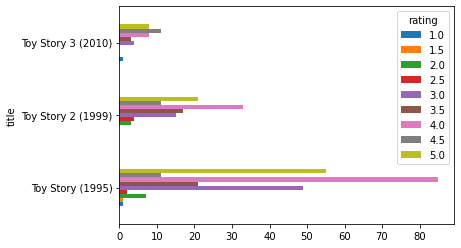

In [57]:
#We plot the above info for better visualization.

dftoystory.groupby(['title','rating']).size().unstack().plot(kind='barh',stacked=False,legend=True)
plt.show()

We can observe that for Toy Story (1995), 16 users rated 1 and 820 users rated 5. In general we can see that for bothh toy story movies the ratings are mostly 4 and 5.So users must have liked the toy story movies very much.

3.Top 25 movies by viewership rating

In [58]:
#NExt we find the best rating movies by all user. A movie was rated by different people so we take mean for those ratings. We obtain 25 top rated movies by different users.
High_rated_movies=pd.DataFrame(dfmaster.groupby(["title","rating"]).agg("mean")).sort_values(by="rating",ascending=False).head(25)


In [59]:
High_rated_movies

,,movieId,user_id,timestamp,age
title,rating,,,,
House of Wax (1953),5.0,6629.0,15.000000,1.447478e+09,49.000000
Foxfire (1996),5.0,835.0,16.000000,8.428900e+08,21.000000
Bolt (2008),5.0,63859.0,5.000000,1.303500e+09,33.000000
"Fox and the Hound, The (1981)",5.0,1033.0,561.000000,9.479999e+08,23.000000
Soylent Green (1973),5.0,2009.0,409.750000,1.046289e+09,25.500000
Boiler Room (2000),5.0,3298.0,394.666667,1.272506e+09,37.000000
M. Butterfly (1993),5.0,488.0,601.000000,9.389419e+08,19.000000
Space Cowboys (2000),5.0,3827.0,155.000000,1.037918e+09,31.500000
Space Jam (1996),5.0,673.0,541.500000,1.149092e+09,37.500000


In [60]:
High_rated_movies.drop(['movieId','user_id','timestamp','age'],axis=1)


,
title,rating
House of Wax (1953),5.0
Foxfire (1996),5.0
Bolt (2008),5.0
"Fox and the Hound, The (1981)",5.0
Soylent Green (1973),5.0
Boiler Room (2000),5.0
M. Butterfly (1993),5.0
Space Cowboys (2000),5.0
Space Jam (1996),5.0


So above movies are the top rated 25 movies by different users.

4. Find the ratings for all the movies reviewed by for a particular user of user id = 2

In [63]:
#selecting the column, userid=2 and sort values based on ratings

userid_=dfmaster[dfmaster['user_id']==2]
userid_.sort_values('rating',ascending=False,ignore_index=True)

,movieId,title,genres,user_id,rating,timestamp,age,sex,occupation,zip_code
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0,859046895,53,F,other,94043
1,805,"Time to Kill, A (1996)",Drama|Thriller,2,5.0,859047091,53,F,other,94043
2,17,Sense and Sensibility (1995),Drama|Romance,2,5.0,859046896,53,F,other,94043
3,36,Dead Man Walking (1995),Crime|Drama,2,5.0,859046959,53,F,other,94043
4,62,Mr. Holland's Opus (1995),Drama,2,5.0,859046896,53,F,other,94043
5,608,Fargo (1996),Comedy|Crime|Drama|Thriller,2,5.0,859046959,53,F,other,94043
6,376,"River Wild, The (1994)",Action|Thriller,2,4.0,859047004,53,F,other,94043
7,1073,Willy Wonka & the Chocolate Factory (1971),Children|Comedy|Fantasy|Musical,2,4.0,859046959,53,F,other,94043
8,802,Phenomenon (1996),Drama|Romance,2,4.0,859047091,53,F,other,94043
9,788,"Nutty Professor, The (1996)",Comedy|Fantasy|Romance|Sci-Fi,2,4.0,859047004,53,F,other,94043


The userid=2, he rated only one movie as 5 and that movie is Lone Star. He is of the age group 25-34.

Feature Engineering

In [64]:
#splitting the column genre
dfgenres=dfmaster['genres'].str.split('|')
dfgenres

0         [Adventure, Animation, Children, Comedy, Fantasy]
1                                         [Comedy, Romance]
2                                                  [Comedy]
3                                                   [Drama]
4                                          [Drama, Romance]
                                ...                        
105334                            [Action, Crime, Thriller]
105335                                             [Comedy]
105336                                     [Action, Comedy]
105337                        [Animation, Children, Comedy]
105338             [Adventure, Animation, Children, Comedy]
Name: genres, Length: 105339, dtype: object

In [65]:
#converting to object type into a set so that only unique items will be present.

listgenres= set()
for genre in dfgenres:
    listgenres=listgenres.union(set(genre))
listgenres

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [66]:
#to turn categorical column (column of labels ) into indicator columns 

ratingonehot = dfmaster['genres'].str.get_dummies("|")
ratingonehot

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105334,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
105335,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
105336,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
105337,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [67]:
#combining the genre indicator column with our master dataset using merge
dfmaster=pd.merge(dfmaster,ratingonehot,how='inner',left_index=True, right_index=True)
dfmaster.head()

,movieId,title,genres,user_id,rating,timestamp,age,sex,occupation,zip_code,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0,859046895,53,F,other,94043,...,0,0,0,0,0,0,0,0,0,0
1,3,Grumpier Old Men (1995),Comedy|Romance,2,2.0,859046959,53,F,other,94043,...,0,0,0,0,0,1,0,0,0,0
2,5,Father of the Bride Part II (1995),Comedy,2,3.0,859046959,53,F,other,94043,...,0,0,0,0,0,0,0,0,0,0
3,14,Nixon (1995),Drama,2,4.0,859047091,53,F,other,94043,...,0,0,0,0,0,0,0,0,0,0
4,17,Sense and Sensibility (1995),Drama|Romance,2,5.0,859046896,53,F,other,94043,...,0,0,0,0,0,1,0,0,0,0


In [68]:
dfmaster.columns

Index(['movieId', 'title', 'genres', 'user_id', 'rating', 'timestamp', 'age',
       'sex', 'occupation', 'zip_code', '(no genres listed)', 'Action',
       'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [69]:
dfmaster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105339 entries, 0 to 105338
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   movieId             105339 non-null  int64  
 1   title               105339 non-null  object 
 2   genres              105339 non-null  object 
 3   user_id             105339 non-null  int64  
 4   rating              105339 non-null  float64
 5   timestamp           105339 non-null  int64  
 6   age                 105339 non-null  int64  
 7   sex                 105339 non-null  object 
 8   occupation          105339 non-null  object 
 9   zip_code            105339 non-null  object 
 10  (no genres listed)  105339 non-null  int64  
 11  Action              105339 non-null  int64  
 12  Adventure           105339 non-null  int64  
 13  Animation           105339 non-null  int64  
 14  Children            105339 non-null  int64  
 15  Comedy              105339 non-nul

We can see that there are 5 object data types. For machine learning we have to convert into integer numerical data

In [70]:
#performing onehotencoding into sex column and hence converting it into binary

genderencoding=dfmaster['sex'].str.get_dummies("")
genderencoding

,F,M
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
105334,0,1
105335,0,1
105336,0,1
105337,0,1


In [71]:
#combing the gender indicator column with our master dataset using merge
dfmaster = pd.merge(dfmaster,genderencoding, how='inner', left_index=True, right_index=True)
dfmaster.head()

,movieId,title,genres,user_id,rating,timestamp,age,sex,occupation,zip_code,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,F,M
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0,859046895,53,F,other,94043,...,0,0,0,0,0,0,0,0,1,0
1,3,Grumpier Old Men (1995),Comedy|Romance,2,2.0,859046959,53,F,other,94043,...,0,0,0,1,0,0,0,0,1,0
2,5,Father of the Bride Part II (1995),Comedy,2,3.0,859046959,53,F,other,94043,...,0,0,0,0,0,0,0,0,1,0
3,14,Nixon (1995),Drama,2,4.0,859047091,53,F,other,94043,...,0,0,0,0,0,0,0,0,1,0
4,17,Sense and Sensibility (1995),Drama|Romance,2,5.0,859046896,53,F,other,94043,...,0,0,0,1,0,0,0,0,1,0


In [73]:
#we remove the object columns now

dfmaster=dfmaster.drop(['genres','sex','zip_code','title','occupation'], axis=1)
dfmaster

,movieId,user_id,rating,timestamp,age,(no genres listed),Action,Adventure,Animation,Children,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,F,M
0,1,2,5.0,859046895,53,0,0,1,1,1,...,0,0,0,0,0,0,0,0,1,0
1,3,2,2.0,859046959,53,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,5,2,3.0,859046959,53,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,14,2,4.0,859047091,53,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,17,2,5.0,859046896,53,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105334,130634,306,3.5,1448900778,45,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
105335,133419,306,4.5,1448900797,45,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
105336,134368,306,4.5,1448900753,45,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
105337,134853,306,4.5,1448899911,45,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1


In [74]:
dfmaster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105339 entries, 0 to 105338
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   movieId             105339 non-null  int64  
 1   user_id             105339 non-null  int64  
 2   rating              105339 non-null  float64
 3   timestamp           105339 non-null  int64  
 4   age                 105339 non-null  int64  
 5   (no genres listed)  105339 non-null  int64  
 6   Action              105339 non-null  int64  
 7   Adventure           105339 non-null  int64  
 8   Animation           105339 non-null  int64  
 9   Children            105339 non-null  int64  
 10  Comedy              105339 non-null  int64  
 11  Crime               105339 non-null  int64  
 12  Documentary         105339 non-null  int64  
 13  Drama               105339 non-null  int64  
 14  Fantasy             105339 non-null  int64  
 15  Film-Noir           105339 non-nul

We can see that now there are no object data types in the dataframe.

Machine Learning: Now we need to predict the movie ratings using an appropriate model.

In [75]:
#splitting the dataset into target variable and feature variables.

x=dfmaster.drop(['rating'],axis=1)
y=dfmaster['rating']


In [76]:
x

,movieId,user_id,timestamp,age,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,F,M
0,1,2,859046895,53,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
1,3,2,859046959,53,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,5,2,859046959,53,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,14,2,859047091,53,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,17,2,859046896,53,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105334,130634,306,1448900778,45,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
105335,133419,306,1448900797,45,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
105336,134368,306,1448900753,45,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
105337,134853,306,1448899911,45,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1


In [77]:
y

0         5.0
1         2.0
2         3.0
3         4.0
4         5.0
         ... 
105334    3.5
105335    4.5
105336    4.5
105337    4.5
105338    4.5
Name: rating, Length: 105339, dtype: float64

In [78]:
y = y.astype(int)

In [79]:
y

0         5
1         2
2         3
3         4
4         5
         ..
105334    3
105335    4
105336    4
105337    4
105338    4
Name: rating, Length: 105339, dtype: int32

Now we need to determine the features affecting the ratings of any particular movie.

In [80]:
#we select chi square test to select test to select the best featuresnto predict the catagory

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures =SelectKBest(score_func=chi2,k=10)
fit= bestfeatures.fit(x,y)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)

#concat two dataframe for better visualization

featurescores=pd.concat([dfcolumns,dfscores],axis=1)
featurescores.columns=['specs','score']  #naming the dataframe columns
print(featurescores.nlargest(10,'score'))    #printing the 10 best features

        specs         score
2   timestamp  4.581164e+10
0     movieId  2.720552e+07
1     user_id  6.471574e+04
3         age  1.357235e+03
12      Drama  7.461770e+02
15     Horror  4.790040e+02
24          F  4.550374e+02
22        War  3.941011e+02
9      Comedy  2.999975e+02
10      Crime  2.223884e+02


In [81]:
print('The features affecting the ratings of any particular movie:')
print()
print(specs.columns)

The features affecting the ratings of any particular movie:



NameError: name 'specs' is not defined

In [84]:
selected_features_df=dfmaster[['timestamp','movieId','user_id','age','Drama','Horror','War','Film-Noir','Sci-Fi','Action']]
selected_features_df

,timestamp,movieId,user_id,age,Drama,Horror,War,Film-Noir,Sci-Fi,Action
0,859046895,1,2,53,0,0,0,0,0,0
1,859046959,3,2,53,0,0,0,0,0,0
2,859046959,5,2,53,0,0,0,0,0,0
3,859047091,14,2,53,1,0,0,0,0,0
4,859046896,17,2,53,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
105334,1448900778,130634,306,45,0,0,0,0,0,1
105335,1448900797,133419,306,45,0,0,0,0,0,0
105336,1448900753,134368,306,45,0,0,0,0,0,1
105337,1448899911,134853,306,45,0,0,0,0,0,0


In [85]:
#Create train and test data set
x_train,x_test,y_train,y_test = train_test_split(selected_features_df,y,test_size=0.33,random_state=42)


In [86]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((70577, 10), (34762, 10), (70577,), (34762,))

Now we try some machine learning models to predict the target using our select features and then choose the model which gives the most accurate results.

In [87]:
#logistic Regression

logreg =LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

#acc_log = round(logreg.score(y_test,y_pred) *100,2)
#acc_log

metrics.confusion_matrix(y_test,y_pred)

array([[    0,     0,     0,     0,   410,     0],
       [    0,     0,     0,     0,  1604,     0],
       [    0,     0,     0,     0,  4367,     0],
       [    0,     0,     0,     0, 11245,     0],
       [    0,     0,     0,     0, 12248,     0],
       [    0,     0,     0,     0,  4888,     0]], dtype=int64)

In [88]:
metrics.accuracy_score(y_test,y_pred)

0.35233876071572406

In [89]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       410
           1       0.00      0.00      0.00      1604
           2       0.00      0.00      0.00      4367
           3       0.00      0.00      0.00     11245
           4       0.35      1.00      0.52     12248
           5       0.00      0.00      0.00      4888

    accuracy                           0.35     34762
   macro avg       0.06      0.17      0.09     34762
weighted avg       0.12      0.35      0.18     34762



C:\Users\manus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
logreg.coef_

array([[-1.90224052e-09, -8.79605715e-15, -8.00709240e-16,
        -6.95012315e-17, -1.20808665e-18, -4.09954699e-20,
        -1.47360878e-19, -4.04260622e-20, -2.68378600e-19,
        -4.67563136e-19],
       [-7.05541843e-10,  1.15335605e-14, -2.79704146e-16,
        -3.64682534e-17, -1.22571505e-18,  3.38086473e-19,
        -1.94775406e-19, -5.72024732e-20,  7.07685308e-20,
        -4.88713732e-20],
       [ 2.31944004e-10,  7.16733484e-14,  5.21756171e-16,
        -3.15844425e-17, -1.48468896e-18,  4.49810450e-19,
        -3.16687684e-19, -1.21099490e-19,  4.74651003e-19,
         5.78893945e-19],
       [ 1.01541149e-09,  1.53265848e-14,  5.66206027e-16,
         4.13624074e-17, -3.23783813e-19,  6.77512532e-21,
        -3.33121698e-19, -8.69634714e-20, -6.53332800e-20,
         7.74468656e-19],
       [ 1.09555941e-09, -4.64753574e-14, -1.14518632e-16,
         7.26096597e-17,  2.42559659e-18, -4.70523995e-19,
         4.18044389e-19,  1.43283499e-19, -3.67951219e-19,
        -6.

In [91]:
logreg.intercept_

array([-1.98769456e-18, -8.26938242e-19, -3.46191737e-19,  1.19314218e-18,
        1.12932810e-18,  8.38354265e-19])

In [92]:
selected_features_df.columns

Index(['timestamp', 'movieId', 'user_id', 'age', 'Drama', 'Horror', 'War',
       'Film-Noir', 'Sci-Fi', 'Action'],
      dtype='object')

In [94]:
logreg.predict_proba(x_test)

array([[0.01250622, 0.04722073, 0.13370752, 0.31909253, 0.34878772,
        0.13868528],
       [0.02123808, 0.06274665, 0.14660804, 0.29797072, 0.3203932 ,
        0.1510433 ],
       [0.01774674, 0.05702545, 0.1423017 , 0.30556644, 0.33041384,
        0.14694583],
       ...,
       [0.01576622, 0.05351888, 0.13941711, 0.31032188, 0.33679134,
        0.14418458],
       [0.0091864 , 0.03989843, 0.12607019, 0.32974718, 0.36382952,
        0.13126828],
       [0.0191929 , 0.05946045, 0.14419259, 0.3023106 , 0.32609457,
        0.14874888]])

Logistic Regression gives an accuracy score of 34%.

In [97]:
#Naive Bayes Classifier

from sklearn.naive_bayes import GaussianNB
GN=GaussianNB().fit(x_train,y_train)
GN_Predictions = GN.predict(x_test)

#accuracy on x_test

accuracy = GN.score(x_test, y_test)

#creating a confusion matrix

Pcm=confusion_matrix(y_test,GN_Predictions)

accuracy

0.349462056268339

Naive Bayes gives an accuracy score of 34%

In [98]:
#KNN 


from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 8).fit(x_train, y_train)

#accuracy on x_test

accuracy=knn.score(x_test,y_test)

#creating a confusion matrix

knn_predictions = knn.predict(x_test)
cm = confusion_matrix(y_test,knn_predictions)

accuracy

0.4079742247281514

KNN Gives an accuracy score of 40%

In [99]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)
Y_pred = decision_tree.predict(x_test)
# Model Accuracy, how often is the classifier correct?
Accuracy=accuracy_score(Y_pred,y_test)
print(Accuracy)

0.3788332086761406


Decision tree gives an accuracy score of 37

Out of the machine learning models we tried, best accuracy was given by K Nearest Neighbour(KNN). So we select KNN for predicting our target variable